## Predicting Student Maths Scores using Linear Regression and Random Forest

Description:
This experiment compares two machine learning algorithms — Linear Regression and RandomForestRegressor — to predict students’ Maths scores based on demographic, academic, and resource usage data.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


Linear Regression Performance:
R² Score: 0.8307
RMSE: 6.00
MAE: 4.57

Random Forest Performance:
R² Score: 0.8589
RMSE: 5.48
MAE: 4.15


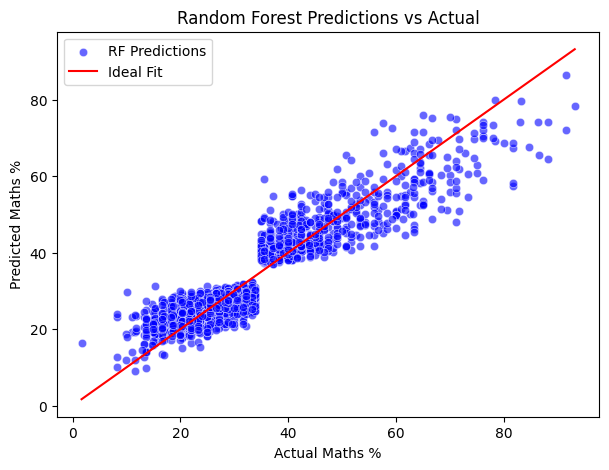

In [18]:
def load_and_prepare_data(filepath, target_col="Maths_Percentage"):
    df = pd.read_csv("nas-students-data.csv")

    # One-hot encode categorical columns
    df_encoded = pd.get_dummies(df, drop_first=True)

    # Features & target
    X = df_encoded.drop(columns=[target_col], errors='ignore')
    y = df_encoded[target_col]

    return X, y

# 2. Train-Test split
def split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# 3. Train & evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name="Model"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")

    return r2, rmse, mae, y_pred

# 4. Main pipeline
if __name__ == "__main__":
    # Load data
    X, y = load_and_prepare_data("nas-students-data.csv")

    # Train-test split
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Linear Regression
    lin_reg = LinearRegression()
    lin_r2, lin_rmse, lin_mae, lin_pred = evaluate_model(lin_reg, X_train, X_test, y_train, y_test, "Linear Regression")

    # Random Forest Regressor
    rf_reg = RandomForestRegressor(
        n_estimators=300,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    )
    rf_r2, rf_rmse, rf_mae, rf_pred = evaluate_model(rf_reg, X_train, X_test, y_train, y_test, "Random Forest")

    # Compare visually
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=y_test, y=rf_pred, alpha=0.6, color="blue", label="RF Predictions")
    sns.lineplot(x=y_test, y=y_test, color="red", label="Ideal Fit")
    plt.xlabel("Actual Maths %")
    plt.ylabel("Predicted Maths %")
    plt.title("Random Forest Predictions vs Actual")
    plt.legend()
    plt.show()